# Implementacion de regresión lineal con framework

Michelle Yareni Morales Ramón A01552627

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt



**Importar datos**

Para esta implementación se hizo uso del dataset 'CO2 emissions by vehicles',

Base en kaggle: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles  

Base en el repositorio: https://github.com/michelle-morales/Portafolio-implementacion-IA-1/blob/main/co2_prueba.csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('/content/gdrive/MyDrive/IA_concentracion/co2_prueba.csv')

Mounted at /content/gdrive


**Descripción del problema**

En esta implementación se abordará el mismo problema sobre modelar una relación entre una variable que se quiere predecir, 'CO2 Emissions(g/km)', y alguna variable que influya en ella, la diferencia es que en este caso se usará framework para hacer el modelo. De igual manera se implementará la técnica de regresión lineal, para buscar establecer una ecuación que mejore el ajuste de los datos y de esta manera poder hacer predicciones o estimaciones.

In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


**Descripción de los datos**

Número de registros: 7385

Total de variables: 12

Cantidad de variables categóricas: 5

Cantidad de variables numéricas: 7

**Variables usadas para implementar la regresión**

Como se trata de una regresión lienal simple se escogieron únicamente dos variables, la predictora y la de salida.

Variable independiente: 'Fuel Consumption Comb (mpg)'. Valores entre 11 y 69.

Variable dependiente: 'CO2 Emissions(g/km)'. Esta es la variable de salida y toma valores entre 96 y 522.

In [ ]:
X = df['Fuel Consumption Comb (mpg)']
y = df['CO2 Emissions(g/km)']

**Parametros iniciales para hacer el train_test_split**

train_size: 0.75

random_state: 100

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.75,
                                        random_state = 100,
                                        shuffle      = True
                                    )

**Implememtación del modelo**

Se probaron cambiar los hiper parametros pero los que dieron un mejor resultado fueron los siguientes.


In [ ]:
model1 = LinearRegression(fit_intercept=True, copy_X=False, n_jobs=5, positive=False)

In [ ]:
model1.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression(copy_X=False, n_jobs=5)

**Predicción con datos nuevos para probar el modelo**

In [ ]:
# Valores de x para hacer predicciones
x1 = 20
x2 = 35
x3 = 50

# Hacer predicciones
prediccion_x1 = model1.predict([[x1]])  # Predicción para x1
prediccion_x2 = model1.predict([[x2]])  # Predicción para x2
prediccion_x3 = model1.predict([[x3]])  # Predicción para x3

print(f'Predicción para x1 = {x1}: {prediccion_x1[0]}')
print(f'Predicción para x2 = {x2}: {prediccion_x2[0]}')
print(f'Predicción para x3 = {x3}: {prediccion_x3[0]}')

Predicción para x1 = 20: [305.15301863]
Predicción para x2 = 35: [195.66647739]
Predicción para x3 = 50: [86.17993615]


**Evaluación del desempeño del modelo**

En este caso se usaron el MSE, MAE y R2 como métricas de desempeño, ya que se trata de una regresión lineal y lo que se busca evaluar es el error.

**Predicciones en el conjunto Train**

In [ ]:
#subset train
y_train_pred = model1.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)

r2_train = r2_score(y_train, y_train_pred)


print("subset de entrenamiento")
print(f"MSE en conjunto de entrenamiento: {mse_train:.2f}")
print(f"MAE en conjunto de entrenamiento: {mae_train:.2f}")
print(f"R2 en conjunto de entrenamiento: {r2_train:.2f}")

subset de entrenamiento
MSE en conjunto de entrenamiento: 615.15
MAE en conjunto de entrenamiento: 16.28
R2 en conjunto de entrenamiento: 0.82


**Predicciones en el conjunto Test**

In [ ]:
#subset test
y_test_pred = model1.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("subset de prueba")
print(f"MSE en conjunto de Test: {mse_test:.2f}")
print(f"MAE en conjunto de Test: {mae_test:.2f}")
print(f"R2 en conjunto de Test: {r2_test:.2f}")

subset de validacion
MSE en conjunto de Test: 572.85
MAE en conjunto de Test: 16.15
R2 en conjunto de Test: 0.83


**Score en el subconjunto de entrenamiento**

MSE = 615.15

MAE = 16.28

R2 = 0.82

**Score en el subconjunto de prueba**

MSE = 572.85

MAE = 16.15

R2 = 0.83

**Grafica de predicciones y valores reales**

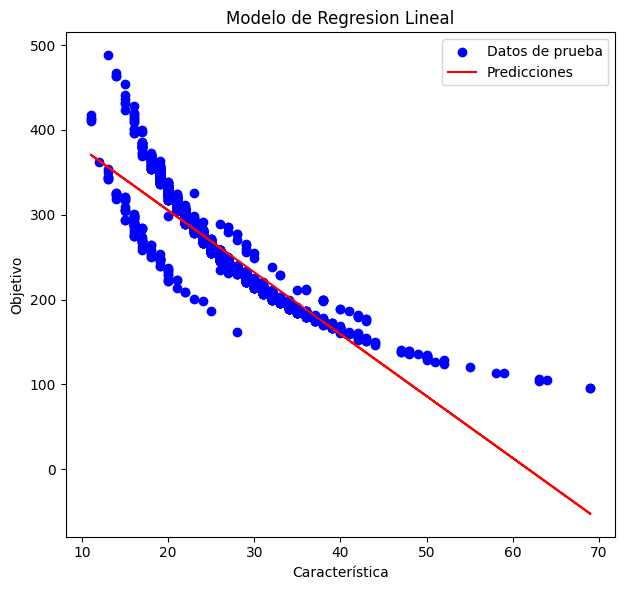

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Datos de prueba', color='b')
plt.plot(X_test, y_test_pred, label='Predicciones', color='r')
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.title('Modelo de Regresion Lineal (LinearRegressor)')
plt.legend()

plt.tight_layout()
plt.show()

**Segundo modelo**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.75,
                                        random_state = 100,
                                        shuffle      = True
                                    )

**Hiperparámetros**

Este método cuenta con más hiperparámetros por lo que se probaron distintos valores de estos.

Finalmente se escogieron los siguientes valores ya que daban un error menor:

- alpha: 0.00001
- l1_ratio: 0.5
- max_iter: 2000
- tol: 0.01
- epsilon: 0.2
- random_state: 6  
- validation_fraction: 0.1
- n_iter_no_change: 5

In [ ]:
model2 = SGDRegressor(alpha=0.00001, l1_ratio=0.5,
                      max_iter=2000, tol=0.01,
                      epsilon=0.2, random_state=6,
                      validation_fraction=0.1, n_iter_no_change=5)
model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=1e-05, epsilon=0.2, l1_ratio=0.5, max_iter=2000,
             random_state=6, tol=0.01)

**Evaluación del desempeño del modelo**

In [ ]:
#subset train
y_train_pred = model2.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)

r2_train = r2_score(y_train, y_train_pred)


print("subset de entrenamiento")
print(f"MSE en conjunto de entrenamiento: {mse_train:.2f}")
print(f"MAE en conjunto de entrenamiento: {mae_train:.2f}")
print(f"R2 en conjunto de entrenamiento: {r2_train:.2f}")

subset de entrenamiento
MSE en conjunto de entrenamiento: 618.73
MAE en conjunto de entrenamiento: 16.94
R2 en conjunto de entrenamiento: 0.82


In [ ]:
#subset test
y_test_pred = model2.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("subset de validacion")
print(f"MSE en conjunto de Test: {mse_test:.2f}")
print(f"MAE en conjunto de Test: {mae_test:.2f}")
print(f"R2 en conjunto de Test: {r2_test:.2f}")

subset de validacion
MSE en conjunto de Test: 579.38
MAE en conjunto de Test: 16.83
R2 en conjunto de Test: 0.83


**Grafica de predicciones y valores reales**

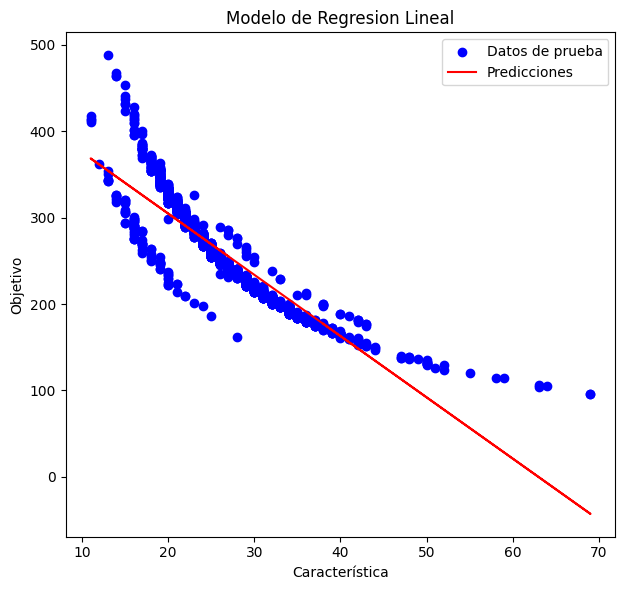

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Datos de prueba', color='b')
plt.plot(X_test, y_test_pred, label='Predicciones', color='r')
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.title('Modelo de Regresion Lineal (SGDRegressor)')
plt.legend()

plt.tight_layout()
plt.show()

**Conclusiones**

El primer modelo tuvo un error MSE un poco menor que el segundo, pero el MAE y R2 se mantuvieron casi iguales en ambos modelos, por lo que son muy similares.
Como los errores son grandes podríamos concluir que el modelo no es muy bueno para hacer predicciones, pero podría mejorar si se aumenta el grado de la regresión.